# A DATA BASED SOLUTION ADDRESSING THE EDUCATIONAL SYSTEM IN NIGERIA

# Predictive Modeling of Student Pass Rates in Exams and Contributing Factors Using Machine Learning

In this notebook, we will undertake a comprehensive machine learning workflow aimed at predicting student performance rates in their exams based on historical data.

## 1. Problem Definition

A significant concern across the African continent has been the sub-par quality of elementary and secondary education, further highlighted by the recent shift to computer-based tests for students in senior secondary school (SSS3). In response, various civil society organizations (CSOs), governments, and other bodies have taken steps to improve the quality of education and, by extension, student performance.

Recent statistics from JAMB (the Nigerian pre-tertiary examination governing body) indicate that 76% (approximately 4 out of 5) of students who participated in the 2024 UTME scored less than 200 (50%). This insight underscores the need for proactive solutions to this problem, which we aim to address in this notebook.

## 2. Data Overview

The data is sourced from a survey of over 200 students who took the JAMB exam between 2020 and 2024. Additionally, synthetic data was created based on the survey, research, and literature review, totaling 1,000 data points.

## 3. Evaluation Metrics

The performance of the predictive model will be assessed using key performance indicators such as:
- **Root Mean Squared Error (RMSE)**
- **R-squared (R²)**
- **Mean Absolute Error (MAE)**

## 4. Feature Description

The features in the dataset include:

| Feature                     | Description                                                                                       |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| **student_name**            | The identifier for each student (names are not included to preserve anonymity).                   |
| **exam**                    | Specifies the type of exam the student was preparing for. It could be JAMB, WAEC, or both exams.  |
| **first_time**              | Indicates whether this is the student's first time writing the specified exam. The values are Yes or No. |
| **prev_exam_result**        | Describes the outcome of the student's previous exam attempts, with options like Good, Bad, Average, or None if they haven’t taken it before. |
| **challenges_faced**        | Highlights the difficulties the student encountered during their previous exam attempt. Examples include Technical issues, Anxiety, Lack of Finance, or None if they didn’t face any challenges. |
| **prep_level**              | Indicates the student’s preparation level for their last exam, with values ranging from None to levels 1–5 indicating increasing degrees of preparation. |
| **school_support**          | Describes how the student's school supported them in their previous exam preparation. Options include Extra lessons, Counseling, Mock exams, Strict supervision, and more. |
| **teacher_impact**          | Indicates the perceived effectiveness of teachers during the student’s preparation for the last exam. Values could be None, Positive, Negative, or Positive & Negative. |
| **fail_reason**             | Lists the reason why the student believes they failed or didn't do as well as they'd have liked in the exam, such as Lack of planning, Inadequate preparation, or Procrastination. |
| **prep_strategy**           | Specifies the student’s preparation strategy for their upcoming exam. Strategies may include I study with a partner, I focus on weak areas, I practice with past questions, etc. |
| **subject_failed**          | Indicates which subjects the student failed or had their lowest score, if any. Examples include Maths, English, Physics, etc., or None if they didn’t fail any subject. |
| **student_category**        | The category of subjects the student is focusing on, such as Commercial, Art, or Science.         |
| **subjects_taken**          | The subjects the student is currently taking. This is a list of up to 4 subjects, which includes a mandatory subject like English and category-specific subjects. |
| **income_bracket**          | Represents the student’s average monthly household income bracket, expressed in thousands of Nigerian Naira (₦). For example, 0–100 means the household earns between ₦0 and ₦100,000 per month. |
| **year**                    | The year the student took the exam, spanning from 2020 to 2024.                                   |
| **jamb_score**              | The student's score in the JAMB exam.                                                             |

With this foundational understanding, let's proceed to import the datasets and begin our exploratory data analysis. Our initial objective will be to establish a baseline model, followed by iterative improvements.

🚀 Let's get started!

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


### Connect to the data warehouse

In [39]:
# Connect to the PostgreSQL database
connection = psycopg2.connect(
    host='******************',  # Domain name
    database='**********',
    user='***********',
    password='********',
    port=*****  # Port number
)

# Write a query to select data from your table
query = 'SELECT * FROM School_data'  

# Use pandas to execute the query and store the result in a DataFrame
df = pd.read_sql(query, connection)

# Close the connection
connection.close()

# Display the first few rows of the DataFrame
df.head()


c:\Users\user\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,student_name,exam,first_time,prev_exam_result,challenges_faced,prep_level,school_support,teacher_impact,fail_reason,prep_strategy,subject_failed,student_category,subjects_taken,income_bracket,year,jamb_score
0,Student_5,JAMB,Yes,Average,Fear,3,Accountability partners,Negative,External issues,I followed a routine,Biology,Science,['English' 'Maths' 'Biology' 'Chemistry'],0-100,2021,150
1,Student_6,JAMB,Yes,Bad,nan,3,nan,Negative,nan,I study with a partner,Accounting,Commercial,['English' 'Economics' 'Commerce' 'Accounting'],0-100,2024,209
2,Student_7,WAEC,Yes,nan,Lack of time due to chores/work,3,Mock exams,nan,Procrastination,I focus on weak areas,Commerce,Commercial,['English' 'Economics' 'Commerce' 'Accounting'],0-100,2021,213
3,Student_8,JAMB,Yes,Good,Time management,5,Extra lesson,Positive & Negative,nan,I practice with past questions,Maths,Science,['English' 'Maths' 'Chemistry' 'Biology'],0-100,2023,168
4,Student_9,JAMB and WAEC,Yes,Bad,Lack of Finance,5,nan,nan,Procrastination,I focus on weak areas,Economics,Commercial,['English' 'Economics' 'Commerce' 'Accounting'],0-100,2022,203


## 1. UNDERSTANDING THE DATA

In [40]:
# Examine the shape of the DataFrame
df.shape

(1000, 16)

Our data has 1000 records and 16 columns

In [41]:
# Display the columns of the DataFrame
df.columns

Index(['student_name', 'exam', 'first_time', 'prev_exam_result',
       'challenges_faced', 'prep_level', 'school_support', 'teacher_impact',
       'fail_reason', 'prep_strategy', 'subject_failed', 'student_category',
       'subjects_taken', 'income_bracket', 'year', 'jamb_score'],
      dtype='object')

In [42]:
# save the data to a csv file
df.to_csv('school_data.csv', index=False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_name      1000 non-null   object
 1   exam              1000 non-null   object
 2   first_time        1000 non-null   object
 3   prev_exam_result  1000 non-null   object
 4   challenges_faced  1000 non-null   object
 5   prep_level        1000 non-null   object
 6   school_support    1000 non-null   object
 7   teacher_impact    1000 non-null   object
 8   fail_reason       1000 non-null   object
 9   prep_strategy     1000 non-null   object
 10  subject_failed    1000 non-null   object
 11  student_category  1000 non-null   object
 12  subjects_taken    1000 non-null   object
 13  income_bracket    1000 non-null   object
 14  year              1000 non-null   int64 
 15  jamb_score        1000 non-null   int64 
dtypes: int64(2), object(14)
memory usage: 125.1+ KB


In [44]:
# Get basic statistics of the numeric columns
print(df.describe())

             year   jamb_score
count  1000.00000  1000.000000
mean   2022.17700   228.129000
std       1.32719    38.688101
min    2020.00000   150.000000
25%    2021.00000   201.000000
50%    2022.00000   227.000000
75%    2023.00000   255.000000
max    2024.00000   320.000000


From here I can see the avergae Jamb score of the students is 228

In [45]:
# Check for missing values
print(df.isnull().sum())

student_name        0
exam                0
first_time          0
prev_exam_result    0
challenges_faced    0
prep_level          0
school_support      0
teacher_impact      0
fail_reason         0
prep_strategy       0
subject_failed      0
student_category    0
subjects_taken      0
income_bracket      0
year                0
jamb_score          0
dtype: int64


I have no missing values in the dataset

In [46]:
categorical_columns = ['exam', 'first_time', 'prev_exam_result', 'challenges_faced', 'prep_level', 'school_support', 'teacher_impact', 'fail_reason', 'prep_strategy', 'subject_failed', 'student_category', 'income_bracket']

for column in categorical_columns:
    print(df[column].value_counts())

JAMB             387
WAEC             316
JAMB and WAEC    297
Name: exam, dtype: int64
Yes    632
No     368
Name: first_time, dtype: int64
Bad        312
Good       275
Average    220
nan        193
Name: prev_exam_result, dtype: int64
Time management                    208
Fear                               172
Long waiting time                  152
Anxiety                            129
nan                                 90
Lack of Finance                     53
Technical issues                    48
No guardian/supervisor              45
Subject difficulty                  44
Other commitments                   36
Lack of time due to chores/work     23
Name: challenges_faced, dtype: int64
3    257
5    250
4    239
     117
2     92
1     45
Name: prep_level, dtype: int64
nan                        310
Strict supervision         153
Mock exams                 151
Extra lesson               135
Counseling                 101
Moral Support               95
Accountability partners  

### Visualization of Some Categorical variables

<AxesSubplot:title={'center':'Challenges Faced by Students'}>

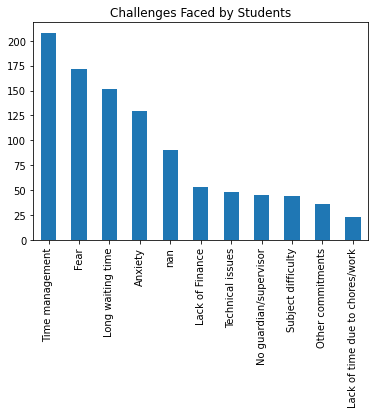

In [47]:
# Examine the distribution of the mentioned challenges faced by students
df['challenges_faced'].value_counts().plot(kind='bar', title='Challenges Faced by Students')

<AxesSubplot:title={'center':'Reasons for Failing Exams'}>

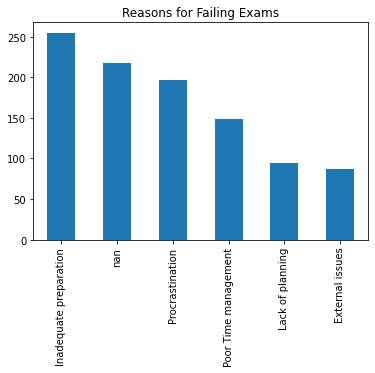

In [48]:
# Examine the distribution of the mentioned reasons for failing exams
df['fail_reason'].value_counts().plot(kind='bar', title='Reasons for Failing Exams')

<AxesSubplot:title={'center':'Subjects Failed by Students'}>

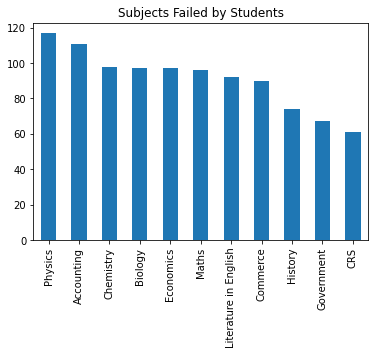

In [49]:
# examine the distrubution of subjects failed by students
df['subject_failed'].value_counts().plot(kind='bar', title='Subjects Failed by Students')


<AxesSubplot:title={'center':'Student Categories'}>

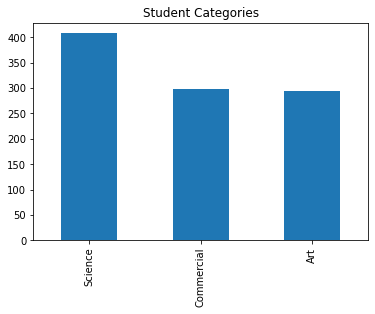

In [50]:
# Examine the distribution of the student categories
df['student_category'].value_counts().plot(kind='bar', title='Student Categories')

<AxesSubplot:title={'center':'Income Brackets in 000s of Naira'}>

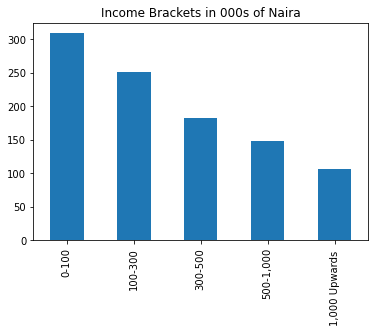

In [51]:
# Examining the distribution of the income brackets in '000s of Naira
df['income_bracket'].value_counts().plot(kind='bar', title='Income Brackets in 000s of Naira')


## 2. EXPLORATORY DATA ANALYSIS(EDA)

By conducting these group comparisons, i'll try to identify key trends, correlations, and insights, such as:

* Which student categories perform best on average.
* How different preparation strategies or challenges influence performance.
* The impact of socioeconomic factors like household income on exam outcomes.

### I. Group Comparison: JAMB Scores by Student Category
This comparison checks how jamb_score differs across the different student categories (e.g., Commercial, Art, Science).


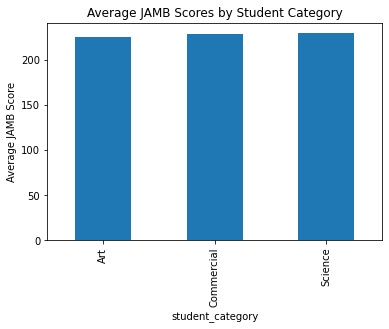

In [56]:
# Group Comparison
mean_scores = df.groupby('student_category')['jamb_score'].mean()
mean_scores.plot(kind='bar')
plt.title('Average JAMB Scores by Student Category')
plt.ylabel('Average JAMB Score')
plt.show()



The figure above shows that Science students are the best performing in the exams just by a little margin

### II. Group Comparison: JAMB Scores by Preparation Strategy
Analyze how different preparation strategies (e.g., reviewing notes daily, attending extra classes) affect jamb_score..

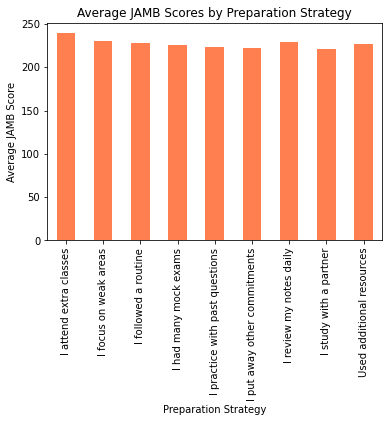

In [58]:
# Group by prep_strategy and calculate the mean jamb_score
mean_scores_by_strategy = df.groupby('prep_strategy')['jamb_score'].mean()

# Plot the average jamb_score for each preparation strategy
mean_scores_by_strategy.plot(kind='bar', color='coral')
plt.title('Average JAMB Scores by Preparation Strategy')
plt.xlabel('Preparation Strategy')
plt.ylabel('Average JAMB Score')
plt.xticks(rotation=90)
plt.show()


This plot shows us that people who attend extra classes, focus on weak areas, review their notes daily, followed a routine and had many mock exams tend to have higher jamb scores

### III. Group Comparison: JAMB Scores by Challenges Faced

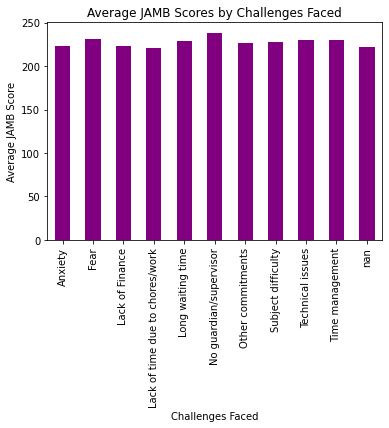

In [60]:
# Group by challenges and calculate the mean jamb_score
mean_scores_by_challenges = df.groupby('challenges_faced')['jamb_score'].mean()

# Plot the average jamb_score for each type of challenge faced
mean_scores_by_challenges.plot(kind='bar', color='purple')
plt.title('Average JAMB Scores by Challenges Faced')
plt.xlabel('Challenges Faced')
plt.ylabel('Average JAMB Score')
plt.xticks(rotation=90)
plt.show()


### IV.  Group Comparison: JAMB Scores by Household Income Bracket
This comparison shows how jamb_score varies across different income brackets.

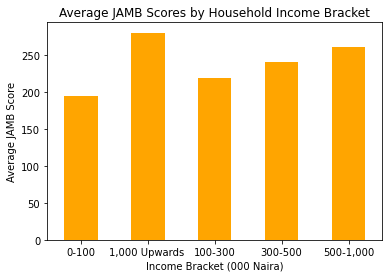

In [61]:
# Group by income_bracket and calculate the mean jamb_score
mean_scores_by_income = df.groupby('income_bracket')['jamb_score'].mean()

# Plot the average jamb_score for each income bracket
mean_scores_by_income.plot(kind='bar', color='orange')
plt.title('Average JAMB Scores by Household Income Bracket')
plt.xlabel('Income Bracket (000 Naira)')
plt.ylabel('Average JAMB Score')
plt.xticks(rotation=0)
plt.show()


It's noteworthy that students from higher income brackets tend to have higher jamb scores

### V. Group Comparison: JAMB Scores by School Support
Evaluate how different forms of school support (e.g., mock exams, counseling) affect the jamb_score.

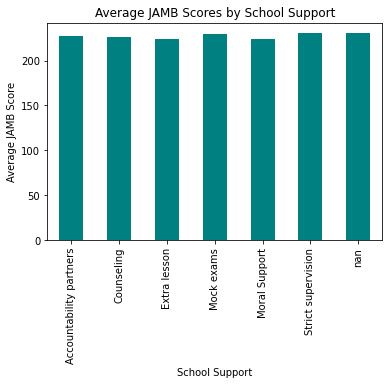

In [62]:
# Group by school_support and calculate the mean jamb_score
mean_scores_by_support = df.groupby('school_support')['jamb_score'].mean()

# Plot the average jamb_score for each type of school support
mean_scores_by_support.plot(kind='bar', color='teal')
plt.title('Average JAMB Scores by School Support')
plt.xlabel('School Support')
plt.ylabel('Average JAMB Score')
plt.xticks(rotation=90)
plt.show()


Students who had strict supervision/monitoring tend to have higher jamb scores

### VI Group Comparison: JAMB Scores by Year
This example shows how jamb_score distribution changes over different exam years.

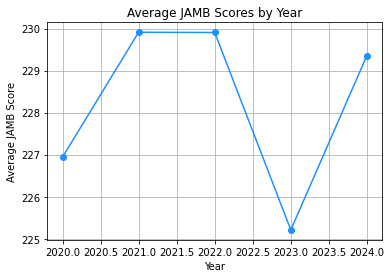

In [63]:
# Group by year and calculate the mean jamb_score
mean_scores_by_year = df.groupby('year')['jamb_score'].mean()

# Plot the average jamb_score for each year
mean_scores_by_year.plot(kind='line', marker='o', color='dodgerblue')
plt.title('Average JAMB Scores by Year')
plt.xlabel('Year')
plt.ylabel('Average JAMB Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


This plot shows the average Jamb score of students in each year

### VII. Group Comparison: Failed Subjects by Student Category
Analyze which subjects students tend to fail more based on their category (Commercial, Art, Science).

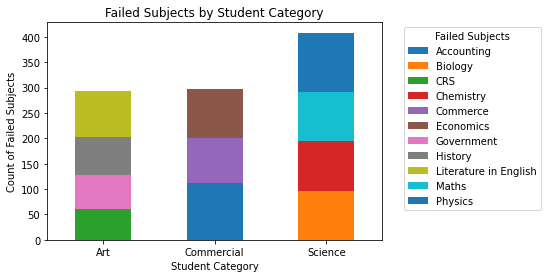

In [66]:
# Group by student_category and count the occurrences of failed subjects
failed_subjects_by_category = df.groupby('student_category')['subject_failed'].value_counts().unstack()

# Plot the number of failed subjects for each student category
failed_subjects_by_category.plot(kind='bar', stacked=True)
plt.title('Failed Subjects by Student Category')
plt.xlabel('Student Category')
plt.ylabel('Count of Failed Subjects')
plt.xticks(rotation=0)
plt.legend(title='Failed Subjects', bbox_to_anchor=(1.05, 1))
plt.show()


This plot shows us the distribution of subjects failed by students in each category

### VIII. Group Comparison: Challenges Faced by Preparation Level
Compare how the challenges faced by students vary depending on how well-prepared they were for the exam.

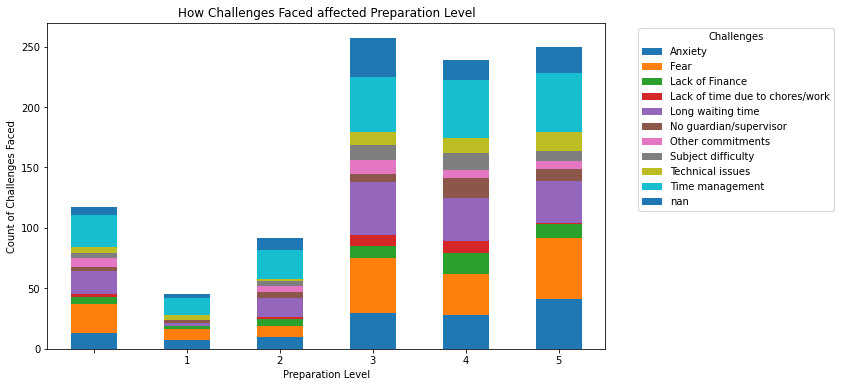

In [72]:
# Group by preparation level and count challenges
challenges_by_prep_level = df.groupby('prep_level')['challenges_faced'].value_counts().unstack()

# Plot challenges faced based on preparation level
challenges_by_prep_level.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('How Challenges Faced affected Preparation Level')
plt.xlabel('Preparation Level')
plt.ylabel('Count of Challenges Faced')
plt.xticks(rotation=0)
plt.legend(title='Challenges', bbox_to_anchor=(1.05, 1))
plt.show()


This plot shows us how some challenges faced affected preparation level and it is important to note that time management, anxiety and fear are consistently recurring themes that affect various students preparation levels

### Summary of Group Comparison Techniques
By conducting these group comparisons, I've identified some key trends, correlations, the impact of socioeconomic factors like household income on exam outcomes and insights such as:

* Science students perform best on average.
* Students who attended extra classes, reviewed their notes daily and followed a routine had better performances.
* Students from households from higher income brackets performed better than students from households in lower income brackets.
* Students whose schools enforced strict supervision/monitoring performed better on a average


## 3. HYPOTHESIS TESTING
I want to examine the relationship between jamb scores of first time writers and second time writers

* **Null Hypothesis (H₀)**: The average JAMB scores of first-time writers (group1) and non-first-time writers (group2) are equal.
* **Alternative Hypothesis** (H₁): The average JAMB scores of first-time writers and non-first-time writers are not equal.

In [76]:
# Hypothesis Testing 
from scipy import stats
group1 = df[df['first_time'] == 'Yes']['jamb_score']
group2 = df[df['first_time'] == 'No']['jamb_score']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: -0.10423122255534767, P-value: 0.9170067992813473


#### Interpretation of Results

The T-statistic = -0.1042, which is very close to zero. This suggests that the mean difference between the JAMB scores of first-time and non-first-time writers is very small, and the two groups have very similar performance.

P-value = 0.9170 is much higher than the common threshold of 0.05. This means there is a 91.7% chance that any difference observed in the JAMB scores between first-time and non-first-time writers is due to random chance, rather than a real difference between the group

**Summary**


based on the hypothesis test:

* The difference in average JAMB scores between first-time exam takers and repeat exam takers is not statistically significant.
* There is no evidence to suggest that being a first-time writer or not has a meaningful impact on JAMB performance in your dataset.

## 3. DATA PREPROCESSING AND MODEL BUILDING

In this stage, I will be preprocessing the data to get it ready for model building

The year data represents a categorical variable (e.g., "2020," "2021," etc.), treating it as a numerical feature or encoding it is sufficient and I don't necessarily have to account for cyclicity because there’s no reason to believe the years have a periodic influence (e.g., seasonal trends repeating over multiple years).

In [77]:
categorical_columns

['exam',
 'first_time',
 'prev_exam_result',
 'challenges_faced',
 'prep_level',
 'school_support',
 'teacher_impact',
 'fail_reason',
 'prep_strategy',
 'subject_failed',
 'student_category',
 'income_bracket']

In [79]:
# Convert the 'year' column to a categorical data type
df['year'] = df['year'].astype('category')
# Confirm the change
df['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: year
Non-Null Count  Dtype   
--------------  -----   
1000 non-null   category
dtypes: category(1)
memory usage: 1.3 KB


In [82]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


# Select the features
features = ['exam', 'first_time', 'prev_exam_result', 'challenges_faced', 'prep_level', 'school_support', 'teacher_impact', 
            'fail_reason', 'prep_strategy', 'subject_failed', 'student_category', 'year', 'income_bracket']

# Target variable (JAMB score)
target = 'jamb_score'

# One-hot encode categorical features
categorical_cols = ['exam', 'first_time', 'prev_exam_result', 'challenges_faced', 'prep_level', 'school_support', 'teacher_impact', 
            'fail_reason', 'prep_strategy', 'subject_failed', 'student_category', 'year', 'income_bracket']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Replace column names with appropriate feature names for encoded columns
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)
encoded_features.head()

,exam_JAMB and WAEC,exam_WAEC,first_time_Yes,prev_exam_result_Bad,prev_exam_result_Good,prev_exam_result_nan,challenges_faced_Fear,challenges_faced_Lack of Finance,challenges_faced_Lack of time due to chores/work,challenges_faced_Long waiting time,...,student_category_Commercial,student_category_Science,year_2021,year_2022,year_2023,year_2024,"income_bracket_1,000 Upwards",income_bracket_100-300,income_bracket_300-500,"income_bracket_500-1,000"
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### MODEL BUILDING

In [92]:
import xgboost as xgb


# Combine encoded features with numerical columns (e.g., year)
X = pd.concat([encoded_features, df[['year']]], axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors Regressor (KNN)': KNeighborsRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor(random_state=42,  enable_categorical=True),
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, r2

# Compare the models
results = {}
for name, model in models.items():
    mae, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                           MAE        R2
Linear Regression                    22.296667  0.423761
Random Forest Regressor              22.266333  0.441728
Gradient Boosting Regressor          21.982014  0.455760
Support Vector Regressor (SVR)       29.259322 -0.001215
K-Nearest Neighbors Regressor (KNN)  28.632000  0.006380
XGBoost Regressor                    23.375382  0.371465


In [83]:

# Combine encoded features with numerical columns (e.g., year)
X = pd.concat([encoded_features, df[['year']]], axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize different models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors Regressor (KNN)': KNeighborsRegressor()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, r2

# Compare the models
results = {}
for name, model in models.items():
    mae, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                           MAE        R2
Linear Regression                    22.296667  0.423761
Random Forest Regressor              22.266333  0.441728
Gradient Boosting Regressor          21.982014  0.455760
Support Vector Regressor (SVR)       29.259322 -0.001215
K-Nearest Neighbors Regressor (KNN)  28.632000  0.006380


### HYPERPARAMETER TUNING
Gradient boosting regressor was the best performing model, so I'd optimize it using GridSearchCV



In [93]:
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],    # Step size shrinkage
    'max_depth': [3, 5, 7],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'subsample': [0.8, 1.0]                 # Fraction of samples to be used for fitting the individual base learners
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: ", -grid_search.best_score_)

# Get the best estimator
best_gbr = grid_search.best_estimator_

# Evaluate on the test set
test_score = best_gbr.score(X_test, y_test)
print("Test score of the best model: ", test_score)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validated score:  701.0280200618612
Test score of the best model:  0.4937806320606626


In [95]:
# Get feature importances
feature_importances = best_gbr.feature_importances_
feature_importances


array([1.41985050e-03, 5.01951822e-03, 2.18008041e-03, 2.23956790e-03,
       3.58650371e-03, 9.05565105e-03, 4.19239004e-03, 5.40144060e-03,
       1.21171043e-03, 2.12054811e-03, 6.11958305e-04, 5.72441331e-05,
       2.52357786e-03, 1.83091845e-03, 3.27647148e-03, 4.35226209e-03,
       8.01697296e-03, 7.54694605e-03, 8.83090120e-03, 7.67166966e-03,
       4.64800649e-03, 1.59526206e-03, 2.37324042e-03, 2.82690345e-03,
       3.68185852e-03, 1.86552699e-03, 4.50892008e-03, 6.95027202e-03,
       1.72570521e-03, 1.13633945e-03, 1.33944223e-03, 4.70461749e-03,
       4.70634986e-03, 2.98388099e-03, 2.89981630e-03, 2.44198353e-03,
       3.67772603e-03, 6.13013056e-03, 4.58579901e-03, 3.46128049e-03,
       2.92023792e-03, 1.45437342e-03, 2.48857330e-03, 2.24086691e-03,
       2.08402674e-03, 4.34873789e-03, 2.57433449e-03, 1.27358487e-03,
       4.74311744e-03, 2.34110685e-03, 1.68271195e-03, 1.62393496e-03,
       2.60744927e-03, 7.93735790e-04, 1.18344585e-03, 3.06069224e-03,
      

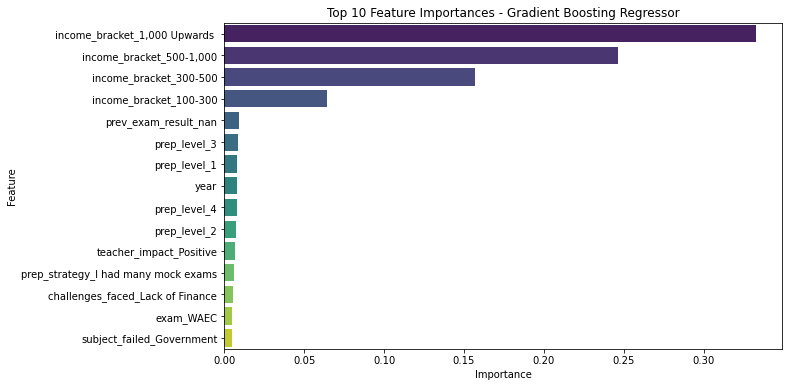

In [101]:
# Get feature importances
importances = best_gbr.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for feature importances
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select the top 10
top_10_feat = feat_importances.sort_values(by='Importance', ascending=False).head(15)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_feat, palette='viridis')
plt.title('Top 10 Feature Importances - Gradient Boosting Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This plot shows that income bracket, preparation level, teacher impact, preparation strategy and chllenges faced are the most important features that contribute to the score of the model

## CONCLUSION

This Notebook contains a machine learning workflow aimed at predicting student performance rates in exams based on historical data. The notebook is divided into several sections:

1. Problem Definition: The notebook addresses the concern of sub-par quality of education in Africa and aims to predict student performance in exams.

2. Data Overview: The notebook imports necessary libraries such as numpy, pandas, and matplotlib. It also connects to a PostgreSQL database and retrieves data from the "School_data" table. The data is then explored and analyzed using various techniques such as examining the shape of the DataFrame, displaying columns, checking for missing values, and visualizing categorical variables.

3. Exploratory Data Analysis (EDA): The notebook performs group comparisons to identify key trends and correlations. It compares JAMB scores across different student categories, preparation strategies, challenges faced, household income brackets, school support, and exam years. Visualizations are used to analyze the data and draw insights.

4. Hypothesis Testing: The notebook conducts a hypothesis test to examine the relationship between JAMB scores of first-time writers and non-first-time writers. The null hypothesis is that the average JAMB scores of the two groups are equal. The alternative hypothesis is that the average JAMB scores are not equal. The results of the hypothesis test suggest that there is no statistically significant difference in the JAMB scores between the two groups.

5. Data Preprocessing and Model Building: The notebook preprocesses the data by converting the 'year' column to a categorical data type. It then selects features and target variables, performs one-hot encoding on categorical features, and splits the data into training and testing sets. Several regression models, including Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor (SVR), and K-Nearest Neighbors Regressor (KNN), are trained and evaluated. The Gradient Boosting Regressor performs the best.

6. Hyperparameter Tuning: The notebook uses GridSearchCV to optimize the parameters of the Gradient Boosting Regressor. The best parameters are found, and the model is evaluated on the test set. The best_gbr model after tuning had a r2 score of approximately 50%

7. Challenges and Probable Solutions: To improve the modelling, we’d need to get more data, more data wasn’t gotten due to time constraints.
If more data is gotten I can employ the use of deep learning algorithms to achieve better predictive performance

8. Summary: The notebook provides a summary of the models' performance and key insights from the analysis. It also includes information about the variables and data present in the notebook.

Overall, the notebook demonstrates a comprehensive machine learning workflow for predicting student performance in exams based on historical data.

